In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from pingouin import ttest

In [2]:
df = pd.read_csv('posts.csv')
df

,id_post,date,likes
0,2442097,1525805964,232906
1,2431591,1525352753,25157
2,2422169,1525187997,106659
3,2418560,1525168885,46889
4,2412029,1525107823,27832
...,...,...,...
97,45660,1437395197,26279
98,45659,1437394873,9918
99,45657,1437340309,45941
100,45656,1437082071,5525


In [3]:
df['date'] = pd.to_datetime([datetime.fromtimestamp(date) for date in df['date']])
df.head(2)

,id_post,date,likes
0,2442097,2018-05-08 21:59:24,232906
1,2431591,2018-05-03 16:05:53,25157


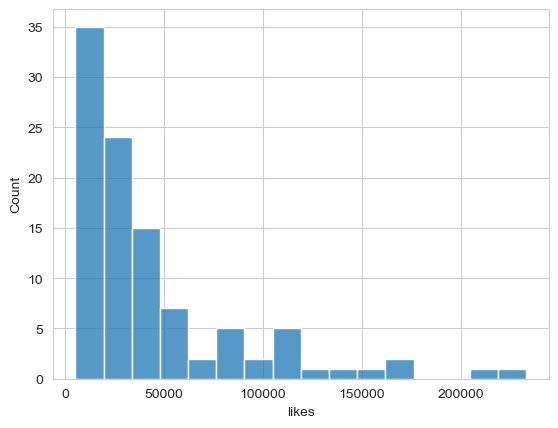

In [4]:
sns.histplot(df['likes']);

In [5]:
df['delay'] = (df['date'] - df['date'].shift(-1)).iloc[:-1]
df.head(2)

,id_post,date,likes,delay
0,2442097,2018-05-08 21:59:24,232906,5 days 05:53:31
1,2431591,2018-05-03 16:05:53,25157,1 days 21:45:56


In [6]:
df['big_time_gap_between_posts'] = 0
df.loc[df['delay'].dt.days > 7, 'big_time_gap_between_posts'] = 1
df.head(2)

,id_post,date,likes,delay,big_time_gap_between_posts
0,2442097,2018-05-08 21:59:24,232906,5 days 05:53:31,0
1,2431591,2018-05-03 16:05:53,25157,1 days 21:45:56,0


,mean,median
big_time_gap_between_posts,,
0,47041.590909,31692.5
1,39590.583333,22229.0


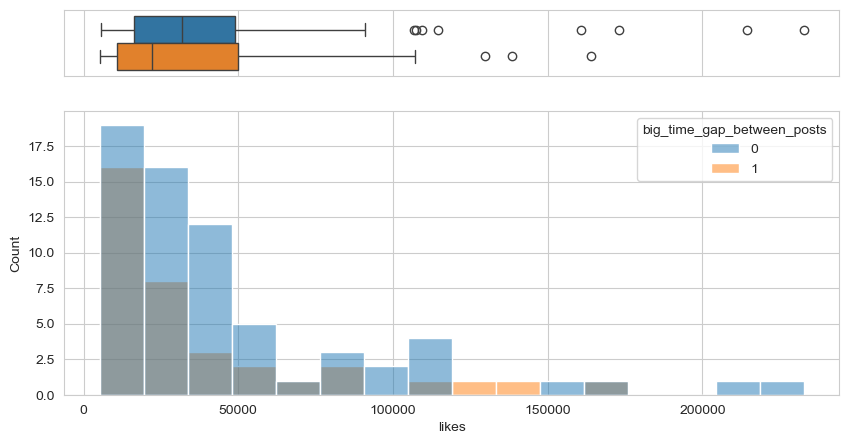

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.823812,81.891301,two-sided,0.412439,"[-25443.85, 10541.83]",0.163143,0.293,0.122051


In [7]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .85)}, figsize=(10, 5))


sns.boxplot(data=df, x="likes", orient="h", ax=ax_box, hue="big_time_gap_between_posts", legend=None)
sns.histplot(data=df, x="likes", ax=ax_hist, hue="big_time_gap_between_posts")

ax_box.set(xlabel='')


display(df.groupby('big_time_gap_between_posts')['likes'].agg({'mean', 'median'}))

plt.show()

big_gap_likes_ser = df.loc[df['big_time_gap_between_posts'] == 1, 'likes']
small_gap_likes_ser = df.loc[df['big_time_gap_between_posts'] == 0, 'likes']

display(ttest(big_gap_likes_ser, small_gap_likes_ser))

In [8]:
df.drop(columns=['delay', 'big_time_gap_between_posts'], inplace=True)

time_period
morning     7
day        40
evening    34
night      21
Name: count, dtype: int64

likes              
              median          mean
time_period                       
morning      21742.0  44000.857143
day          34898.5  51301.000000
evening      22124.0  37170.794118
night        39262.0  43150.142857

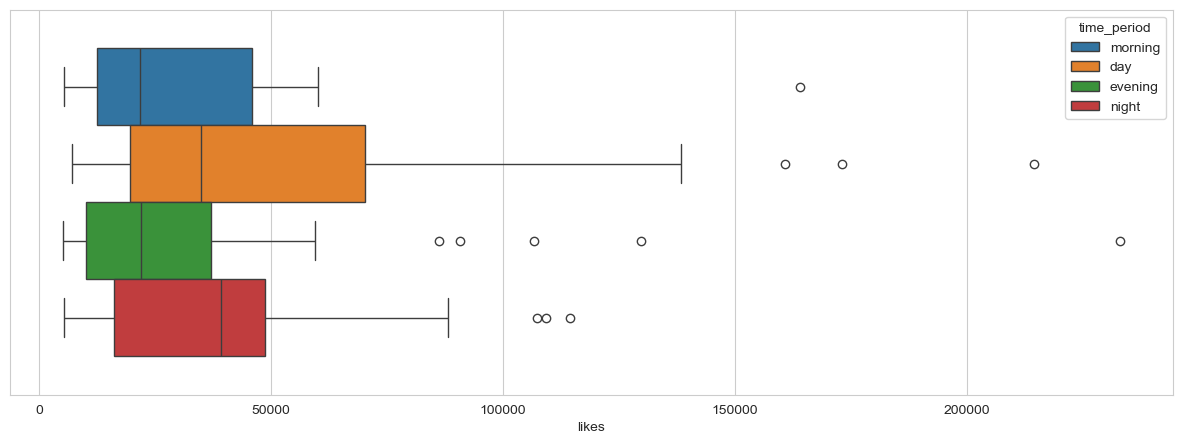

In [9]:
sorted_time_period_l = ['morning', 'day', 'evening', 'night']

df['time_period'] = df['date'].apply(lambda x: 'morning' if 5 <= x.hour <= 12
else 'day' if 12 < x.hour <= 17
else 'evening' if 17 < x.hour <= 23 else 'night')

display(df['time_period'].value_counts()[sorted_time_period_l])

display(df.groupby('time_period').agg({'likes': ['median', 'mean']}).loc[sorted_time_period_l, :])

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='likes', orient='h', hue='time_period', hue_order=sorted_time_period_l)

plt.show()

In [10]:
df.drop(columns='time_period', inplace=True)

day_of_week
Monday       27
Tuesday      21
Wednesday     9
Thursday     15
Friday       13
Saturday      7
Sunday       10
Name: count, dtype: int64

likes              
              median          mean
day_of_week                       
Monday       39581.0  57393.703704
Tuesday      38554.0  60308.666667
Wednesday    21742.0  41387.000000
Thursday     16749.0  24158.666667
Friday       19993.0  31847.846154
Saturday     21844.0  29403.142857
Sunday       27158.5  35918.700000

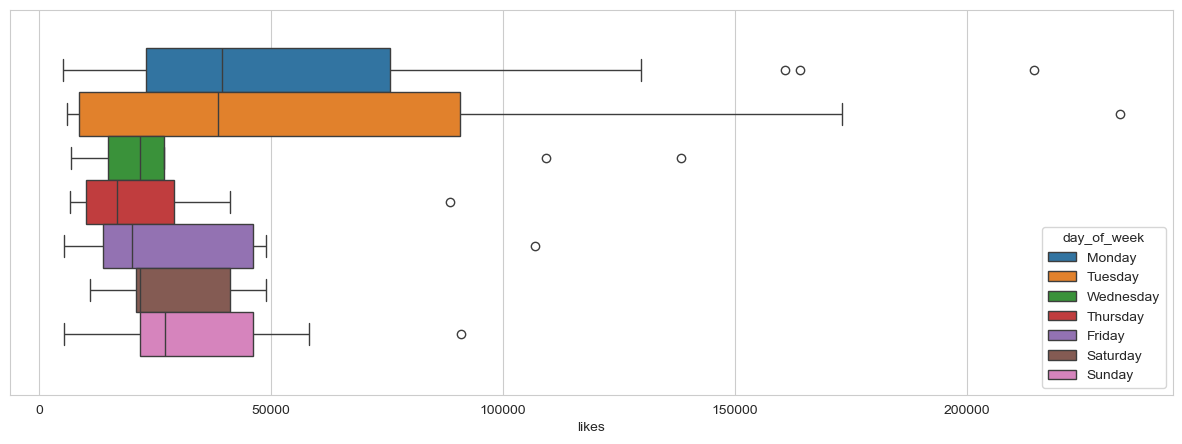

In [11]:
sorted_days_l = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_of_week'] = df['date'].dt.day_name()

display(df['day_of_week'].value_counts()[sorted_days_l])

display(df.groupby('day_of_week').agg({'likes': ['median', 'mean']}).loc[sorted_days_l, :])

plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='likes', orient='h', hue='day_of_week', hue_order=sorted_days_l)

plt.show()

In [12]:
print('Best median result:')
pd.DataFrame({'small_delay_between_posts': [31692.5], 'night_23-05_time': [39262.0], 'monday': [39581.0]})

Best median result:


,small_delay_between_posts,night_23-05_time,monday
0,31692.5,39262.0,39581.0
